In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving test_YCcRUnU.csv to test_YCcRUnU.csv
Saving train_Df64byy.csv to train_Df64byy.csv


{'test_YCcRUnU.csv': b'ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium\n50883,C1,156,Owned,Individual,30,30,No,,6.0,3.0,5,11934.0\n50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8\n50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0\n50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0\n50887,C1,951,Owned,Individual,75,75,No,X3,,,5,22534.0\n50888,C1,1329,Rented,Individual,24,24,No,X2,,,18,6150.0\n50889,C2,3479,Owned,Individual,56,56,No,X5,14+,4.0,17,19152.0\n50890,C13,396,Rented,Individual,41,41,No,,,,16,11034.0\n50891,C18,513,Owned,Individual,22,22,No,X3,,,22,10784.0\n50892,C3,957,Owned,Joint,41,37,Yes,X5,6.0,1.0,22,16934.4\n50893,C1,916,Rented,Individual,22,22,No,X4,,,5,9422.0\n50894,C16,1113,Owned,Individual,38,38,No,X4,2.0,3.0,21,14168.0\n50895,C17,636,Owned,Individual,42,42,No,X2,5.0,2.0,17,14184.0\n50896,C1,1112,Owne

In [4]:
train= pd.read_csv('train_Df64byy.csv')
test= pd.read_csv('test_YCcRUnU.csv')

In [5]:
train.head()

ID City_Code  Region_Code  ... Reco_Policy_Cat Reco_Policy_Premium  Response
0   1        C3         3213  ...              22             11628.0         0
1   2        C5         1117  ...              22             30510.0         0
2   3        C5         3732  ...              19              7450.0         1
3   4       C24         4378  ...              19             17780.0         0
4   5        C8         2190  ...              16             10404.0         0

[5 rows x 14 columns]

In [12]:
test.tail()

ID City_Code  ...  Reco_Policy_Cat Reco_Policy_Premium
21800  72683        C3  ...               18             15884.0
21801  72684        C4  ...               18             21390.0
21802  72685       C12  ...                1             17836.0
21803  72686       C10  ...               19             11568.0
21804  72687        C2  ...                3             23040.0

[5 rows x 13 columns]

In [7]:
print(train.shape)
print(test.shape)

(50882, 14)
(21805, 13)


In [8]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [9]:
(train.isnull().sum()/train.shape[0])*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [10]:
(test.isnull().sum()/test.shape[0])*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [16]:
train.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
uper_lower_same                2
city_encoded                  36
dtype: int64

In [15]:
test.nunique()

ID                         21805
City_Code                     36
Region_Code                 4694
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         5226
uper_lower_same                2
city_encoded                  36
dtype: int64

In [ ]:
MA_cols=['Health Indicator','Holding_Policy_Duration','Holding_Policy_Type']

In [13]:
train['uper_lower_same']=np.where((train['Upper_Age']==train['Lower_Age']),1,0)
test['uper_lower_same']=np.where((test['Upper_Age']==test['Lower_Age']),1,0)

In [17]:
mode_1=train['Health Indicator'].mode()[0]


train['Health Indicator']=train['Health Indicator'].fillna(mode_1)
test['Health Indicator']=test['Health Indicator'].fillna(mode_1)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         50882 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
 13  uper_lower_same          50882 non-null  int64  
 14  city_encoded          

In [ ]:
object_cols=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration']

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['city_encoded']=le.fit_transform(train['City_Code'])
test['city_encoded']=le.fit_transform(test['City_Code'])

In [19]:
train=train.drop(labels='City_Code', axis=1)
test=test.drop(labels='City_Code', axis=1)

In [21]:
Accomodation_map={'Rented':0,'Owned':1}
Reco_Insurance_map={'Individual':0,'Joint':1}
Is_Spouse_map={'No':0,'Yes':1}
Health_Indicator_map={'X1':1,'X2':2,'X4':3,'X3':4,'X6':5,'X5':6,'X8':7,'X7':8,'X9':9}
Holding_Policy_Duration_map={'14+':1, '1.0':2, '3.0':3, '5.0':4, '9.0':5, '14.0':6, '7.0':7,'2.0':8,'11.0':9,
                             '10.0':10, '8.0':11, '6.0':12, '4.0':13, '13.0':14, '12.0':15}

In [25]:
train['reco_spouse_insurance']=np.where((train['Is_Spouse']==1) & (train['Reco_Insurance_Type']==1),1,0)
test['reco_spouse_insurance']=np.where((test['Is_Spouse']==1) & (test['Reco_Insurance_Type']==1),1,0)

In [22]:
train['Accomodation_Type']=train['Accomodation_Type'].map(Accomodation_map)
train['Reco_Insurance_Type']=train['Reco_Insurance_Type'].map(Reco_Insurance_map)
train['Is_Spouse']=train['Is_Spouse'].map(Is_Spouse_map)
train['Health Indicator']=train['Health Indicator'].map(Health_Indicator_map)
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].map(Holding_Policy_Duration_map)

In [23]:
test['Accomodation_Type']=test['Accomodation_Type'].map(Accomodation_map)
test['Reco_Insurance_Type']=test['Reco_Insurance_Type'].map(Reco_Insurance_map)
test['Is_Spouse']=test['Is_Spouse'].map(Is_Spouse_map)
test['Health Indicator']=test['Health Indicator'].map(Health_Indicator_map)
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].map(Holding_Policy_Duration_map)

In [26]:
train['Reco_Policy_Cat_premium_mean']=train.groupby('Reco_Policy_Cat')['Reco_Policy_Premium'].transform('mean')
train['Reco_Policy_Cat_premium_sum']=train.groupby('Reco_Policy_Cat')['Reco_Policy_Premium'].transform('sum')
train['Reco_Insurance_Type_Policy_Count']=train.groupby(['Reco_Insurance_Type','Reco_Policy_Cat'])['Reco_Policy_Cat'].transform('count')
train['Reco_Insurance_Type_premium_mean']=train.groupby(['Reco_Insurance_Type','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('mean')
train['Reco_Insurance_Type_premium_sum']=train.groupby(['Reco_Insurance_Type','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('sum')


In [27]:
test['Reco_Policy_Cat_premium_mean']=test.groupby('Reco_Policy_Cat')['Reco_Policy_Premium'].transform('mean')
test['Reco_Policy_Cat_premium_sum']=test.groupby('Reco_Policy_Cat')['Reco_Policy_Premium'].transform('sum')
test['Reco_Insurance_Type_Policy_Count']=test.groupby(['Reco_Insurance_Type','Reco_Policy_Cat'])['Reco_Policy_Cat'].transform('count')
test['Reco_Insurance_Type_premium_mean']=test.groupby(['Reco_Insurance_Type','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('mean')
test['Reco_Insurance_Type_premium_sum']=test.groupby(['Reco_Insurance_Type','Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('sum')


In [28]:
train['city_region_premium_mean']=train.groupby(['city_encoded','Region_Code'])['Reco_Policy_Premium'].transform('mean')
test['city_region_premium_mean']=test.groupby(['city_encoded','Region_Code'])['Reco_Policy_Premium'].transform('mean')

train['city_region_premium_sum']=train.groupby(['city_encoded','Region_Code'])['Reco_Policy_Premium'].transform('sum')
test['city_region_premium_sum']=test.groupby(['city_encoded','Region_Code'])['Reco_Policy_Premium'].transform('sum')

In [29]:
train['upper_lower_premium_mean']=train.groupby(['Upper_Age','Lower_Age'])['Reco_Policy_Premium'].transform('mean')
train['upper_lower_premium_sum']=train.groupby(['Upper_Age','Lower_Age'])['Reco_Policy_Premium'].transform('sum')


test['upper_lower_premium_mean']=test.groupby(['Upper_Age','Lower_Age'])['Reco_Policy_Premium'].transform('mean')
test['upper_lower_premium_sum']=test.groupby(['Upper_Age','Lower_Age'])['Reco_Policy_Premium'].transform('sum')






In [30]:
train['Is_Spouse_premium_mean']=train.groupby(['Is_Spouse'])['Reco_Policy_Premium'].transform('mean')
test['Is_Spouse_premium_mean']=test.groupby(['Is_Spouse'])['Reco_Policy_Premium'].transform('mean')


train['Accomodation_Type_premium_mean']=train.groupby(['Accomodation_Type'])['Reco_Policy_Premium'].transform('mean')
test['Accomodation_Type_premium_mean']=test.groupby(['Accomodation_Type'])['Reco_Policy_Premium'].transform('mean')




In [31]:
train['Rank_regionwise_premium']=train.groupby(['Region_Code'])['Reco_Policy_Premium'].rank(method='first',ascending=True)
train['Rank_mean_regionwise_premium']=train.groupby(['Region_Code'])['Reco_Policy_Premium'].rank(method='average',ascending=True)
train['Rank_max_regionwise_premium']=train.groupby(['Region_Code'])['Reco_Policy_Premium'].rank(method='max',ascending=True)
train['Rank_min_regionwise_premium']=train.groupby(['Region_Code'])['Reco_Policy_Premium'].rank(method='min',ascending=True)
train['Rank_regionwise_diff']=train['Rank_max_regionwise_premium']- train['Rank_min_regionwise_premium']

In [32]:
test['Rank_regionwise_premium']=test.groupby(['Region_Code'])['Reco_Policy_Premium'].rank(method='first',ascending=True)
test['Rank_mean_regionwise_premium']=test.groupby(['Region_Code'])['Reco_Policy_Premium'].rank(method='average',ascending=True)
test['Rank_max_regionwise_premium']=test.groupby(['Region_Code'])['Reco_Policy_Premium'].rank(method='max',ascending=True)
test['Rank_min_regionwise_premium']=test.groupby(['Region_Code'])['Reco_Policy_Premium'].rank(method='min',ascending=True)
test['Rank_regionwise_diff']=test['Rank_max_regionwise_premium']- test['Rank_min_regionwise_premium']

In [33]:
train.columns

Index(['ID', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'uper_lower_same', 'city_encoded',
       'reco_spouse_insurance', 'Reco_Policy_Cat_premium_mean',
       'Reco_Policy_Cat_premium_sum', 'Reco_Insurance_Type_Policy_Count',
       'Reco_Insurance_Type_premium_mean', 'Reco_Insurance_Type_premium_sum',
       'city_region_premium_mean', 'city_region_premium_sum',
       'upper_lower_premium_mean', 'upper_lower_premium_sum',
       'Is_Spouse_premium_mean', 'Accomodation_Type_premium_mean',
       'Rank_regionwise_premium', 'Rank_mean_regionwise_premium',
       'Rank_max_regionwise_premium', 'Rank_min_regionwise_premium',
       'Rank_regionwise_diff'],
      dtype='object')

In [ ]:
train.describe()

ID  ...  upper_lower_premium_sum
count  50882.000000  ...             5.088200e+04
mean   25441.500000  ...             8.471171e+06
std    14688.512535  ...             8.756525e+06
min        1.000000  ...             4.524000e+03
25%    12721.250000  ...             5.866672e+06
50%    25441.500000  ...             7.889364e+06
75%    38161.750000  ...             9.464130e+06
max    50882.000000  ...             4.577457e+07

[8 rows x 19 columns]

In [ ]:
test.describe()

ID  ...  upper_lower_premium_sum
count  21805.000000  ...             2.180500e+04
mean   61785.000000  ...             3.602835e+06
std     6294.705646  ...             3.678052e+06
min    50883.000000  ...             6.432000e+03
25%    56334.000000  ...             2.560686e+06
50%    61785.000000  ...             3.349086e+06
75%    67236.000000  ...             4.087502e+06
max    72687.000000  ...             1.936501e+07

[8 rows x 18 columns]

In [56]:
train.columns

Index(['ID', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'uper_lower_same', 'city_encoded',
       'reco_spouse_insurance', 'Reco_Policy_Cat_premium_mean',
       'Reco_Policy_Cat_premium_sum', 'Reco_Insurance_Type_Policy_Count',
       'Reco_Insurance_Type_premium_mean', 'Reco_Insurance_Type_premium_sum',
       'city_region_premium_mean', 'city_region_premium_sum',
       'upper_lower_premium_mean', 'upper_lower_premium_sum',
       'Is_Spouse_premium_mean', 'Accomodation_Type_premium_mean',
       'Rank_regionwise_premium', 'Rank_mean_regionwise_premium',
       'Rank_max_regionwise_premium', 'Rank_min_regionwise_premium',
       'Rank_regionwise_diff'],
      dtype='object')

In [162]:
predictors=[ 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type','Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
'Reco_Policy_Cat','Reco_Policy_Premium', 'uper_lower_same', 'city_encoded','reco_spouse_insurance', 'Reco_Policy_Cat_premium_mean',
'Reco_Policy_Cat_premium_sum', 'Reco_Insurance_Type_Policy_Count','Reco_Insurance_Type_premium_mean', 'Reco_Insurance_Type_premium_sum',
'city_region_premium_mean', 'city_region_premium_sum','upper_lower_premium_mean', 'upper_lower_premium_sum',
'Is_Spouse_premium_mean', 'Accomodation_Type_premium_mean','Rank_regionwise_premium', 'Rank_mean_regionwise_premium',
'Rank_max_regionwise_premium', 'Rank_min_regionwise_premium','Rank_regionwise_diff']

target=['Response']


X=train[predictors].values
y=train[target].values


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score,classification_report,confusion_matrix,roc_auc_score,accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier 




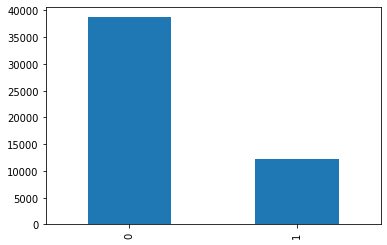

In [85]:
train['Response'].value_counts().plot(kind='bar')

In [ ]:
#GradientBoostingClassifier(loss='exponential',learning_rate=0.1,n_estimators=1750,subsample=0.5,max_depth=15)
#XGBClassifier(max_depth=19, learning_rate=0.25, n_estimators=1560,objective='binary:logistic', booster='gbtree',gamma=0.3,subsample=0.65,colsample_bytree=0.7,colsample_bylevel=0.35)
#lgb.LGBMClassifier(objective='binary',boosting='gbdt',learning_rate = 0.01, max_depth =-1,num_leaves =1254,n_estimators = 1495,bagging_fraction = 0.8,feature_fraction = 0.9,reg_alpha = 0.5,reg_lambda = 0.4)
#CatBoostClassifier(bagging_temperature= 0.41010395885331385,eval_metric='AUC',border_count=186,depth=15,iterations=2323,l2_leaf_reg=21,learning_rate=0.0673344419215237,random_strength=3.230824361824754e-06,scale_pos_weight=0.7421091918485163,verbose=0)








In [163]:
X.shape,y.shape

((50882, 28), (50882, 1))

In [164]:
from sklearn.svm import OneClassSVM
iso = OneClassSVM(nu=0.05)
yhat = iso.fit_predict(X)
mask = yhat != -1
X, y= X[mask, :], y[mask]

In [165]:
X.shape,y.shape

((48344, 28), (48344, 1))

In [173]:
Test_X=test[predictors].values

In [152]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=8, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb2=lgb.LGBMClassifier(objective='binary',boosting='gbdt',learning_rate =0.02547, max_depth =-1,num_leaves =787,n_estimators = 1495,bagging_fraction = 0.8,feature_fraction = 0.7,reg_alpha = 0.5,reg_lambda = 0.4)
    search=nb2.fit(X_train,y_train)
    pred_test=search.predict(X_test)
    pred_train=search.predict(X_train)
    ROC_Auc_score_train=roc_auc_score(y_train,pred_train)
    print("The ROC_Auc_score on Train",ROC_Auc_score_train)
    ROC_Auc_score_test=roc_auc_score(y_test,pred_test)
    print("The ROC_Auc_score on Test",ROC_Auc_score_test)
    print("The confusion Matrix",confusion_matrix(y_test,pred_test))
    #print("The auc of Train",auc(y_train,pred_train))
    #print("The auc of Test",auc(y_train,pred_train))
    print('*'*50)
pred_gb=search.predict_proba(Test_X)[:,1]    

The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5553017911417368
The confusion Matrix [[4454  335]
 [1239  273]]
**************************************************
The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5537693993399777
The confusion Matrix [[4490  299]
 [1255  257]]
**************************************************
The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5518023280865211
The confusion Matrix [[4506  283]
 [1266  246]]
**************************************************
The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5494879275809532
The confusion Matrix [[4487  302]
 [1267  245]]
**************************************************
The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5499486212778035
The confusion Matrix [[4472  316]
 [1262  251]]
**************************************************
The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5507866889445836
The confusion Matrix [[4489  299]
 [1264  248]]
*

In [79]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb1=XGBClassifier(max_depth=19, learning_rate=0.0545325,custom_metric=['AUC'], n_estimators=1560,objective='binary:logistic', booster='gbtree',gamma=0.55,subsample=0.65,colsample_bytree=0.7,colsample_bylevel=0.35)
    search=nb1.fit(X_train,y_train)
    pred_test=search.predict(X_test)
    pred_train=search.predict(X_train)
    ROC_Auc_score_train=roc_auc_score(y_train,pred_train)
    print("The ROC_Auc_score on Train",ROC_Auc_score_train)
    ROC_Auc_score_test=roc_auc_score(y_test,pred_test)
    print("The ROC_Auc_score on Test",ROC_Auc_score_test)
    print("The confusion Matrix",confusion_matrix(y_test,pred_test))
    #print("The auc of Train",auc(y_train,pred_train))
    #print("The auc of Test",auc(y_train,pred_train))
    print('*'*50)
pred_xg=search.predict_proba(Test_X)[:,1]        

The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5242812491125267
The confusion Matrix [[11813  1078]
 [ 3532   538]]
**************************************************
The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5281600766357574
The confusion Matrix [[11894   997]
 [ 3526   544]]
**************************************************
The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.5331901817227415
The confusion Matrix [[11811  1080]
 [ 3458   611]]
**************************************************


In [169]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb=CatBoostClassifier(verbose=False,iterations=3200,learning_rate=1,depth=11,custom_metric='AUC',l2_leaf_reg=5.0,
                           bootstrap_type='Bayesian',bagging_temperature=0.5,sampling_frequency='PerTreeLevel',grow_policy='Depthwise',
                           leaf_estimation_method='Gradient',model_shrink_mode='Constant',class_weights=[0.6,5])
    search=nb.fit(X_train,y_train)
    pred_test=search.predict(X_test)
    pred_train=search.predict(X_train)
    ROC_Auc_score_train=roc_auc_score(y_train,pred_train)
    print("The ROC_Auc_score on Train",ROC_Auc_score_train)
    ROC_Auc_score_test=roc_auc_score(y_test,pred_test)
    print("The ROC_Auc_score on Test",ROC_Auc_score_test)
    print("The confusion Matrix",confusion_matrix(y_test,pred_test))
    print('*'*50)
pred_cat=search.predict_proba(Test_X)[:,1] 

The ROC_Auc_score on Train 1.0
The ROC_Auc_score on Test 0.562066464497439
The confusion Matrix [[9938 2333]
 [2636 1208]]
**************************************************


KeyboardInterrupt: ignored

In [170]:
print("The Classification Report",classification_report(y_test,pred_test))

The Classification Report               precision    recall  f1-score   support

           0       0.76      0.78      0.77     12271
           1       0.23      0.21      0.22      3844

    accuracy                           0.64     16115
   macro avg       0.50      0.50      0.50     16115
weighted avg       0.63      0.64      0.64     16115



In [ ]:
### best submission
The Classification Report               precision    recall  f1-score   support

           0       0.81      1.00      0.89      7734
           1       0.96      0.24      0.38      2442

    accuracy                           0.81     10176
   macro avg       0.89      0.62      0.64     10176
weighted avg       0.84      0.81      0.77     10176


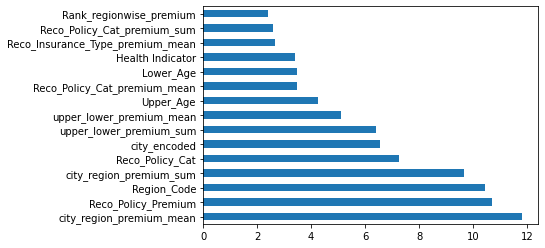

In [171]:
feat_imp = pd.Series(search.feature_importances_, index=predictors)
feat_imp.nlargest(15).plot(kind='barh')

In [53]:
test.head()

ID  Region_Code  ...  Rank_min_regionwise_premium  Rank_regionwise_diff
0  50883          156  ...                          4.0                   0.0
1  50884            7  ...                         35.0                   0.0
2  50885          564  ...                          2.0                   0.0
3  50886         1177  ...                          2.0                   0.0
4  50887          951  ...                         10.0                   0.0

[5 rows x 31 columns]

In [ ]:
test.isnull().sum()

ID                                 0
Region_Code                        0
Accomodation_Type                  0
Reco_Insurance_Type                0
Upper_Age                          0
Lower_Age                          0
Is_Spouse                          0
Health Indicator                   0
Holding_Policy_Duration            0
Holding_Policy_Type                0
Reco_Policy_Cat                    0
Reco_Policy_Premium                0
Health_indicator_imputed           0
Holding_Policy_Duration_imputed    0
Holding_Policy_Type_imputed        0
city_encoded                       0
upper_lower_premium_mean           0
upper_lower_premium_sum            0
dtype: int64

In [103]:
X_T=test[predictors].values
preds_T=search.predict(X_T)
subms_df=pd.DataFrame(preds_T, columns=['target'])

In [104]:
subms_df['target'].value_counts()

0    19393
1     2412
Name: target, dtype: int64

In [174]:
sub_df=pd.DataFrame(test, columns=['ID'])
sub_df['Response']=search.predict_proba(Test_X)[:,1]

In [107]:
sub_df.head(10)

ID  Response
0  50883  0.079715
1  50884  0.309690
2  50885  0.540101
3  50886  0.084959
4  50887  0.022667
5  50888  0.024707
6  50889  0.294963
7  50890  0.881901
8  50891  0.009192
9  50892  0.064397

In [175]:
sub_df.to_csv('subdf.csv', index=False)

In [ ]:
preds[:,0]